# Netflix Data Analysis: EDA, Visualization, Dashboard, and Predictive Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Data retrieved from [Kaggle](https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores), "Netflix Original Films & IMDB Scores"

In [7]:
n = pd.read_csv("NetflixOriginals.csv", encoding='latin1')

#### EDA - nulls, duplicates, reformatting

In [8]:
n.shape

(584, 6)

In [9]:
n.info()
#no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [10]:
n.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [11]:
n.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [55]:
n[n.describe().columns].corr()

,Premiere,Runtime,IMDB Score,Premiere Year
Premiere,1.000000,0.063521,-0.122174,0.980601
Runtime,0.063521,1.000000,-0.040896,0.069262
IMDB Score,-0.122174,-0.040896,1.000000,-0.141347
Premiere Year,0.980601,0.069262,-0.141347,1.000000


In [12]:
n.index

RangeIndex(start=0, stop=584, step=1)

In [13]:
n.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [25]:
n.dtypes

Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object

In [39]:
n['Premiere'] = n['Premiere'].str.replace('.', ',')

In [42]:
n['Premiere'] = pd.to_datetime(n['Premiere'])

In [46]:
n['Premiere Year'] = n['Premiere'].dt.year

In [14]:
n.groupby("Genre")['Runtime'].mean()

Genre
Action              108.000000
Action comedy       101.200000
Action thriller      82.000000
Action-adventure    121.000000
Action-thriller     119.666667
                       ...    
War                 110.500000
War drama           145.500000
War-Comedy          122.000000
Western             116.666667
Zombie/Heist        148.000000
Name: Runtime, Length: 115, dtype: float64

In [15]:
n['Genre'].nunique()

115

In [16]:
n.Genre.value_counts()

Genre
Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: count, Length: 115, dtype: int64

In [17]:
# top ten genres by count of movies (each row is a movie):
n.Genre.value_counts().sort_values(ascending = False).head(10)

Genre
Documentary        159
Drama               77
Comedy              49
Romantic comedy     39
Thriller            33
Comedy-drama        14
Crime drama         11
Biopic               9
Horror               9
Action               7
Name: count, dtype: int64

In [18]:
n['Genre'].unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

In [15]:
n[n['Genre']=='Comedy']

,Title,Genre,Premiere,Runtime,IMDB Score,Language
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi
18,What Happened to Mr. Cha?,Comedy,"January 1, 2021",102,4.3,Korean
22,Sextuplets,Comedy,"August 16, 2019",99,4.4,English
27,Seriously Single,Comedy,"July 31, 2020",107,4.5,English
28,The Misadventures of Hedi and Cokeman,Comedy,"February 10, 2021",99,4.5,French
29,5 Star Christmas,Comedy,"December 7, 2018",95,4.6,Italian
33,Porta dos Fundos: The First Temptation of Christ,Comedy,"December 3, 2019",46,4.6,Portuguese
35,The Players,Comedy,"July 15, 2020",88,4.6,Italian
47,Take the 10,Comedy,"January 20, 2017",80,4.8,English


In [16]:
# Mask Filter
genre_mask = n['Genre'] == 'Comedy'
imdb_mask = n['IMDB Score'] > 6

In [17]:
#and
n[genre_mask & imdb_mask]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
221,Between Two Ferns: The Movie,Comedy,"September 20, 2019",82,6.1,English
229,Like Father,Comedy,"August 3, 2018",103,6.1,English
231,Otherhood,Comedy,"August 2, 2019",100,6.1,English
249,Have You Ever Seen Fireflies?,Comedy,"April 9, 2021",114,6.2,Turkish
261,Win It All,Comedy,"April 7, 2017",88,6.2,English
271,Get the Goat,Comedy,"March 18, 2021",97,6.3,Portuguese
278,Porta dos Fundos: The Last Hangover,Comedy,"December 21, 2018",44,6.3,Portuguese
327,Chopsticks,Comedy,"May 31, 2019",100,6.5,Hindi
342,The Incredible Jessica James,Comedy,"July 28, 2017",83,6.5,English
377,Just Another Christmas,Comedy,"December 3, 2020",101,6.7,Portuguese


In [18]:
#or
n[genre_mask | imdb_mask]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi
18,What Happened to Mr. Cha?,Comedy,"January 1, 2021",102,4.3,Korean
22,Sextuplets,Comedy,"August 16, 2019",99,4.4,English
27,Seriously Single,Comedy,"July 31, 2020",107,4.5,English
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [19]:
n.groupby('Language').size() #/.value_counts()

Language
Bengali                         1
Dutch                           3
English                       401
English/Akan                    1
English/Arabic                  1
English/Hindi                   2
English/Japanese                2
English/Korean                  1
English/Mandarin                2
English/Russian                 1
English/Spanish                 5
English/Swedish                 1
English/Taiwanese/Mandarin      1
English/Ukranian/Russian        1
Filipino                        2
French                         20
Georgian                        1
German                          5
Hindi                          33
Indonesian                      9
Italian                        14
Japanese                        6
Khmer/English/French            1
Korean                          6
Malay                           1
Marathi                         3
Norwegian                       1
Polish                          3
Portuguese                     12
Spani

In [20]:
n.groupby('Genre')['Runtime'].sum()

Genre
Action              756
Action comedy       506
Action thriller      82
Action-adventure    121
Action-thriller     359
                   ... 
War                 221
War drama           291
War-Comedy          122
Western             350
Zombie/Heist        148
Name: Runtime, Length: 115, dtype: int64

In [21]:
# Determine the top rated movie (by star rating) for each genre.
n.sort_values(by = 'IMDB Score', ascending = False).groupby('Genre')['Title'].first()

Genre
Action                                Extraction
Action comedy               Spenser Confidential
Action thriller                         Wheelman
Action-adventure                            Okja
Action-thriller           The Night Comes for Us
                                ...             
War                      The Siege of Jadotville
War drama                    Beasts of No Nation
War-Comedy                           War Machine
Western             The Ballad of Buster Scruggs
Zombie/Heist                    Army of the Dead
Name: Title, Length: 115, dtype: object

In [81]:
n.groupby('Genre')['IMDB Score'].agg(['count', 'min', 'mean'])

,count,min,mean
Genre,,,
Action,7,3.5,5.414286
Action comedy,5,4.2,5.420000
Action thriller,1,6.4,6.400000
Action-adventure,1,7.3,7.300000
Action-thriller,3,5.0,6.133333
...,...,...,...
War,2,6.3,6.750000
War drama,2,6.5,7.100000
War-Comedy,1,6.0,6.000000


### Visualizing the data

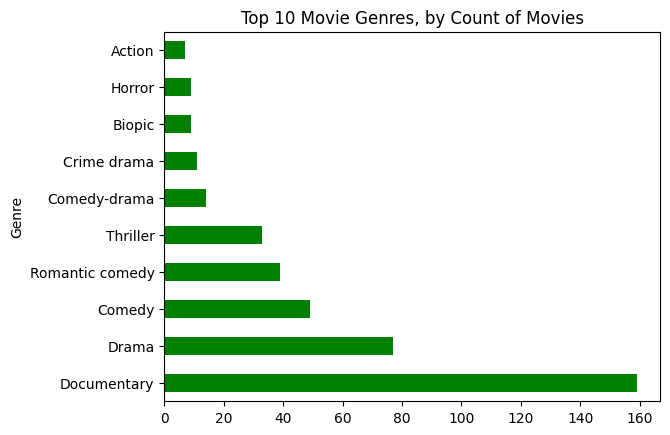

In [22]:
n['Genre'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'barh', color = 'green', title = "Top 10 Movie Genres, by Count of Movies");

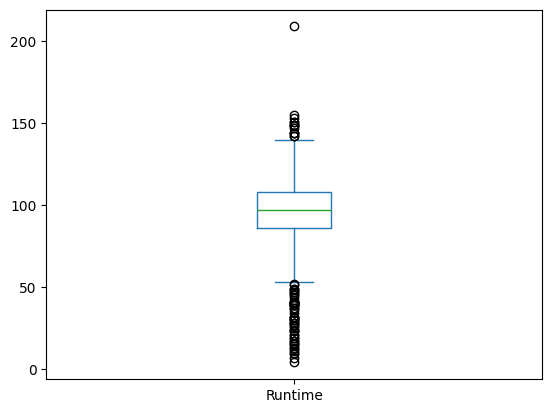

In [23]:
n['Runtime'].plot(kind = 'box');

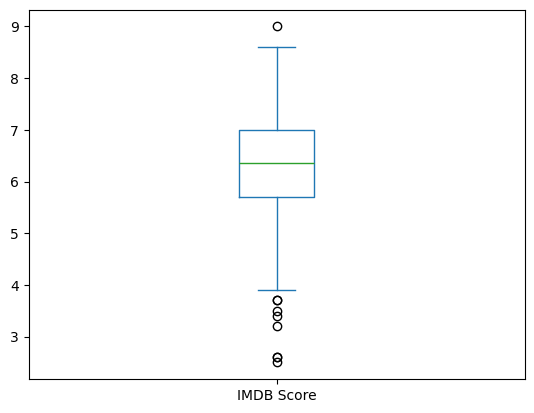

In [24]:
n['IMDB Score'].plot(kind = 'box');

In [60]:
px.box(n, x="Premiere Year", y="Runtime", color = 'Premiere Year', color_discrete_sequence = px.colors.qualitative.Pastel)

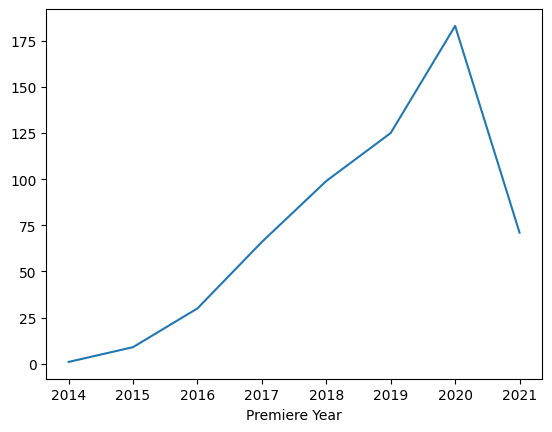

In [57]:
n['Premiere Year'].value_counts().sort_index().plot();

In [61]:
comedy = n['Genre'] == 'Comedy'
n[comedy]['Genre'].value_counts()

Genre
Comedy    49
Name: count, dtype: int64

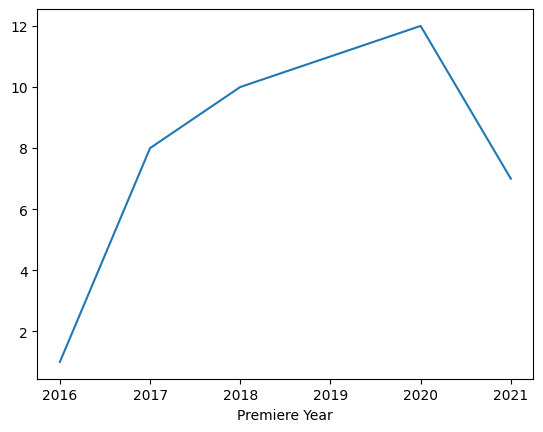

In [63]:
n[comedy]['Premiere Year'].value_counts().sort_index().plot();

<Axes: xlabel='Premiere Year'>

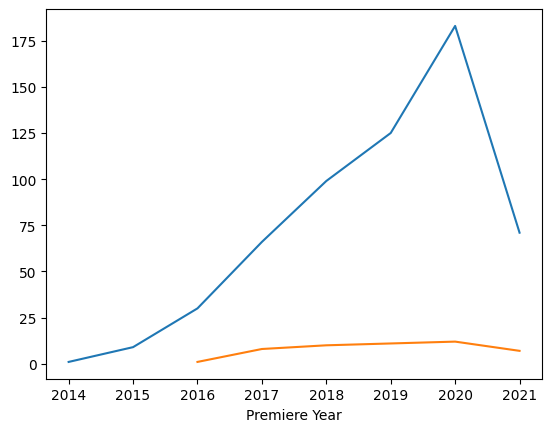

In [64]:
n['Premiere Year'].value_counts().sort_index().plot()
n[comedy]['Premiere Year'].value_counts().sort_index().plot()

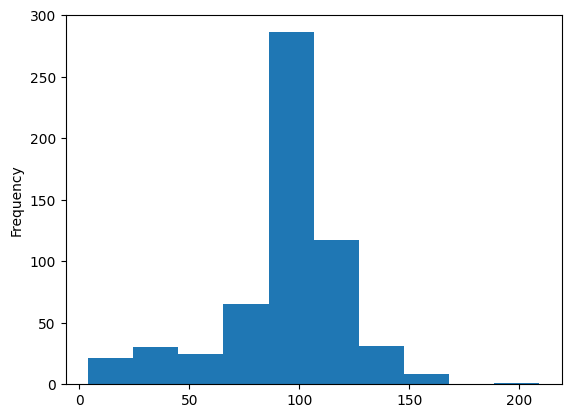

In [65]:
n['Runtime'].plot(kind = 'hist');

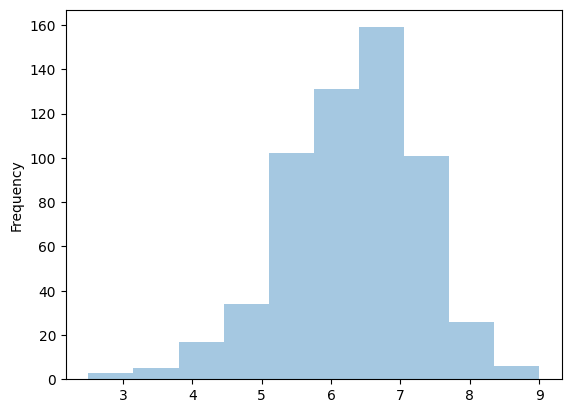

In [66]:
n['IMDB Score'].plot(kind = 'hist', alpha = .4);

In [67]:
n.groupby('Genre')['IMDB Score'].mean().sort_values(ascending = False).head(10)

Genre
Animation/Christmas/Comedy/Adventure    8.200000
Musical / Short                         7.700000
Concert Film                            7.633333
Anthology/Dark comedy                   7.600000
Animation / Science Fiction             7.500000
Making-of                               7.450000
Action-adventure                        7.300000
Historical drama                        7.200000
Coming-of-age comedy-drama              7.200000
Drama-Comedy                            7.200000
Name: IMDB Score, dtype: float64

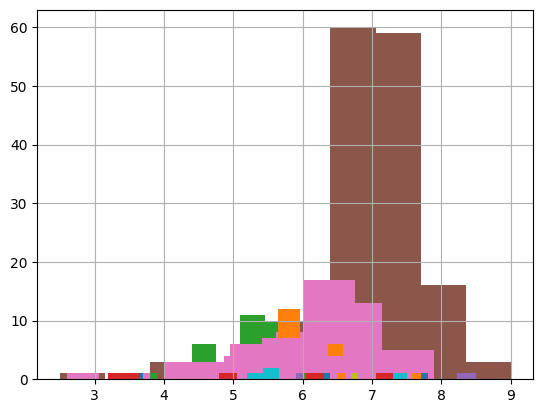

In [120]:
n.groupby('Genre')['IMDB Score'].hist();

### Begin to filter for top ten genres (by count of movies)

In [107]:
topten = n['Genre'].value_counts().sort_values(ascending = False).head(10).index

In [108]:
topten

Index(['Documentary', 'Drama', 'Comedy', 'Romantic comedy', 'Thriller',
       'Comedy-drama', 'Crime drama', 'Biopic', 'Horror', 'Action'],
      dtype='object', name='Genre')

In [113]:
n_topten = n[n['Genre'].isin(topten)]

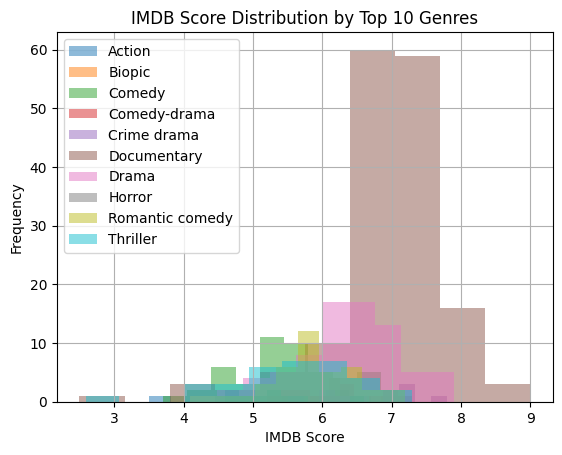

In [127]:
n_topten.groupby('Genre')['IMDB Score'].hist(alpha=0.5, legend = True);
plt.title('IMDB Score Distribution by Top 10 Genres');

plt.xlabel('IMDB Score')
plt.ylabel('Frequency');

In [128]:
# Scatter plot showing correlation between runtime and IMDB Score of movies, colored by Genere

px.scatter(n_topten, x = 'IMDB Score', 
                  y = 'Runtime', 
                  color = 'Genre', 
                  hover_data = ['Title', 'Premiere'],
                  title = "IMDB Score VS Runtime",
                  color_discrete_sequence=px.colors.qualitative.Pastel)

In [142]:
# Treemap showing count of movies per top ten category - Documentary leads the way, Action is last
px.treemap(n_topten, path=['Genre'], title = 'Movie Count for Top Ten Genres', color_discrete_sequence=px.colors.qualitative.Pastel)

In [163]:
n_topten['Premiere Year'] = pd.Categorical(n_topten['Premiere Year'])

/var/folders/rb/qx5qmmrs6nn_8zcrwgr7ds6m0000gn/T/ipykernel_91493/2194937386.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [165]:

px.bar(n_topten.groupby('Premiere Year')['IMDB Score'].mean().reset_index(), 
       x = 'Premiere Year', 
       y = 'IMDB Score', 
       color= 'Premiere Year', 
       color_discrete_sequence=px.colors.qualitative.Pastel)

/var/folders/rb/qx5qmmrs6nn_8zcrwgr7ds6m0000gn/T/ipykernel_91493/3063829180.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [169]:
px.line(n_topten.groupby('Premiere Year')['IMDB Score'].mean().reset_index(), x = "Premiere Year", y = "IMDB Score", color_discrete_sequence=px.colors.qualitative.Pastel)

/var/folders/rb/qx5qmmrs6nn_8zcrwgr7ds6m0000gn/T/ipykernel_91493/1240229449.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [170]:
px.bar(n_topten.groupby('Premiere Year')['Runtime'].mean().reset_index(), x = "Premiere Year", y = "Runtime", color='Premiere Year', color_discrete_sequence=px.colors.qualitative.Pastel)

/var/folders/rb/qx5qmmrs6nn_8zcrwgr7ds6m0000gn/T/ipykernel_91493/1526650268.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [172]:
px.line(n_topten.groupby('Premiere Year')['Runtime'].mean().reset_index(), x = "Premiere Year", y = "Runtime", color_discrete_sequence=px.colors.qualitative.Pastel)

/var/folders/rb/qx5qmmrs6nn_8zcrwgr7ds6m0000gn/T/ipykernel_91493/3950941006.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [174]:
px.box(n_topten, x="Premiere Year", y="Runtime", color = 'Premiere Year', color_discrete_sequence = px.colors.qualitative.Pastel)

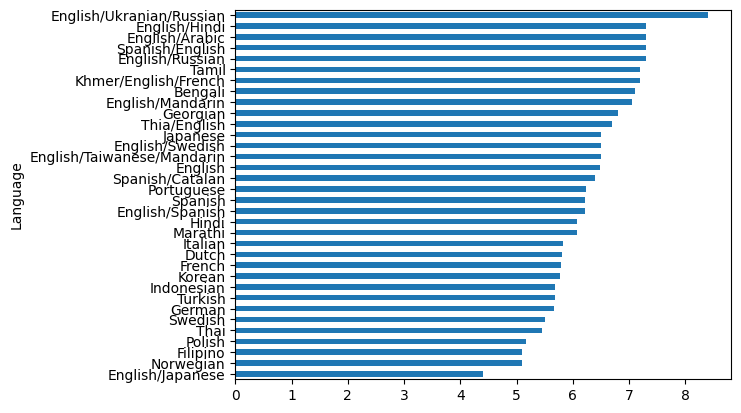

In [179]:
n_topten.groupby('Language')['IMDB Score'].mean().sort_values().plot(kind = 'barh');

### Dashboard for Top Ten Movie Genres

In [262]:
from dash import Dash, dash_table, dcc, callback, Output, Input, html
import dash_mantine_components as dmc

# Create Dash app
app = Dash(__name__)

# Layout
app.layout = html.Div(
    style={'background-color': '#ffcccb'},  # Ensures background is visible
    children=[
        dmc.Container([
            dmc.Title('Netflix Data Dashboard', color="red"),
            
            # Dropdown 
            dmc.Select(
                label="Select Genre",
                id='genre-dropdown',
                value='All Genres',  # Default
                data=[{'value': 'All Genres', 'label': 'All Genres'}] + 
                     [{'value': genre, 'label': genre} for genre in sorted(n_topten['Genre'].unique())]
            ),
            
            # Layout
            dmc.Grid([
                dmc.Col([dcc.Graph(figure={}, id='scatter-graph')]),
                dmc.Col([dcc.Graph(figure={}, id='histogram-graph')], span=6),
                dmc.Col([dcc.Graph(figure={}, id='barchart-graph')], span=6),
                dmc.Col([dcc.Graph(figure={}, id='boxplot-graph')]),
            ]),

            # Data Table
            dmc.Grid([
                dmc.Col([
                    dash_table.DataTable(data=n_topten.to_dict('records'), page_size=8)
                ], span=12),
            ]),
        ])
    ]
)

# Callback to update all four graphs based on selected genre
@callback(
    [
        Output(component_id='scatter-graph', component_property='figure'),
        Output(component_id='histogram-graph', component_property='figure'),
        Output(component_id='barchart-graph', component_property='figure'),
        Output(component_id='boxplot-graph', component_property='figure')
    ],
    Input(component_id='genre-dropdown', component_property='value')
)  
def update_graphs(selected_genre):
    # Filter data based on the selected genre, all data if "All Genres" is selected
    if selected_genre == 'All Genres':
        filtered_data = n_topten
    else:
        filtered_data = n_topten[n_topten['Genre'] == selected_genre]
    
    # Scatter Plot
    scatter_fig = px.scatter(
        filtered_data,
        x='Runtime',
        y='IMDB Score',
        color='Genre',
        hover_data=['Title', 'Premiere'],
        title=f"IMDB Score VS Runtime for {'All Movies' if selected_genre == 'All Genres' else selected_genre} Movies",
        color_discrete_sequence=px.colors.qualitative.Pastel
    )
    scatter_fig.update_traces(showlegend=False)
    
    # Histogram
    histogram_fig = px.histogram(
        filtered_data,
        x='IMDB Score',
        nbins=20,
        color_discrete_sequence=px.colors.qualitative.Pastel,
        title=f"IMDB Score Distribution for {'All Genres' if selected_genre == 'All Genres' else selected_genre}"
    )
    
    # Bar Chart
    barchart_fig = px.bar(
        filtered_data.groupby('Language').size().sort_values(ascending=False).reset_index(name='Count'),
        x='Language',
        y='Count',
        title=f"Number of movies in each language for {'All Genres' if selected_genre == 'All Genres' else selected_genre}",
        color='Language',
        color_discrete_sequence=px.colors.qualitative.Pastel
    )
    barchart_fig.update_traces(showlegend=False)
    
    # Boxplot
    boxplot_fig = px.box(
        filtered_data,
        x='Premiere Year',
        y='Runtime',
        color='Premiere Year',
        color_discrete_sequence=px.colors.qualitative.Pastel,
        title=f"Runtime Distribution for {'All Genres' if selected_genre == 'All Genres' else selected_genre}"
    )
    boxplot_fig.update_traces(showlegend=False)
    
    return scatter_fig, histogram_fig, barchart_fig, boxplot_fig

if __name__ == '__main__':
    app.run(debug=True, port = 8051)


#### Predictive Modelling

In [237]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor

from imblearn.over_sampling import SMOTE

In [200]:
import numpy as np

n_topten['InEnglish'] = np.where(n_topten['Language'] == 'English', 1, 0)

/var/folders/rb/qx5qmmrs6nn_8zcrwgr7ds6m0000gn/T/ipykernel_91493/2451276112.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [203]:
n_topten.InEnglish.value_counts(normalize = True)

InEnglish
1    0.628993
0    0.371007
Name: proportion, dtype: float64

##### Choosing to predict whether the movie is in English or not

In [206]:
px.box(n_topten, x="InEnglish", y="Runtime", color = 'InEnglish', color_discrete_sequence = px.colors.qualitative.Pastel)

In [207]:
px.box(n_topten, x="InEnglish", y="IMDB Score", color = 'InEnglish', color_discrete_sequence = px.colors.qualitative.Pastel)

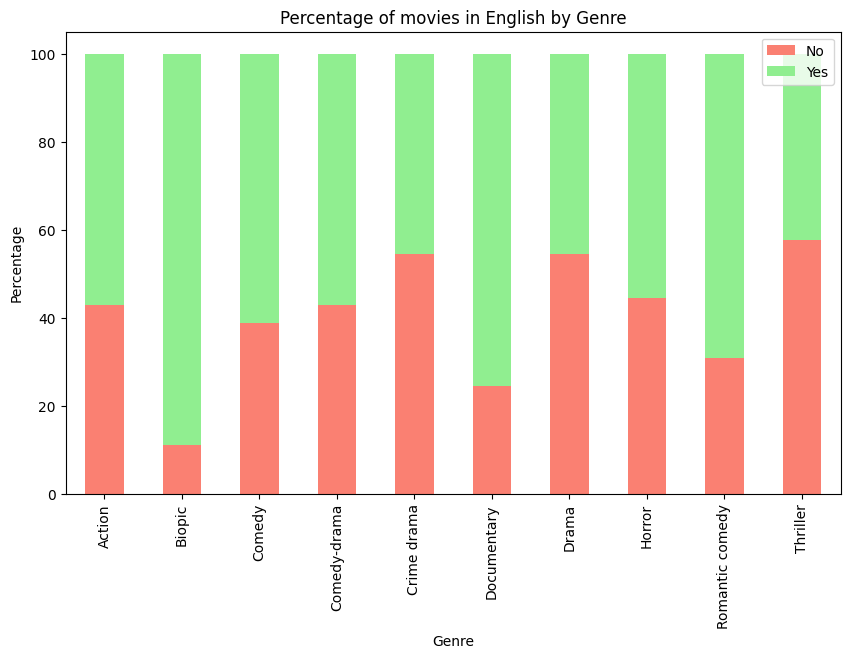

In [226]:
grouped = n_topten.groupby(['Genre', 'InEnglish']).size().unstack(fill_value=0)

grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'lightgreen'])
ax.set_xlabel('Genre')  
ax.set_ylabel('Percentage') 
ax.set_title('Percentage of movies in English by Genre') 
ax.legend(['No', 'Yes'], loc='upper right')
plt.show()

##### We see differences among genre for movies in English/not, slight ones with IMDB Score and Runtime

In [229]:
n_topten['Premiere Year'] = n_topten['Premiere Year'].astype(int)

/var/folders/rb/qx5qmmrs6nn_8zcrwgr7ds6m0000gn/T/ipykernel_91493/668791071.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [230]:
n_topten[n_topten.describe().columns].corr()['InEnglish']

Premiere        -0.331103
Runtime         -0.046552
IMDB Score       0.212956
Premiere Year   -0.325942
InEnglish        1.000000
Name: InEnglish, dtype: float64

In [231]:
corr_matrix = n_topten[n_topten.describe().columns].corr()

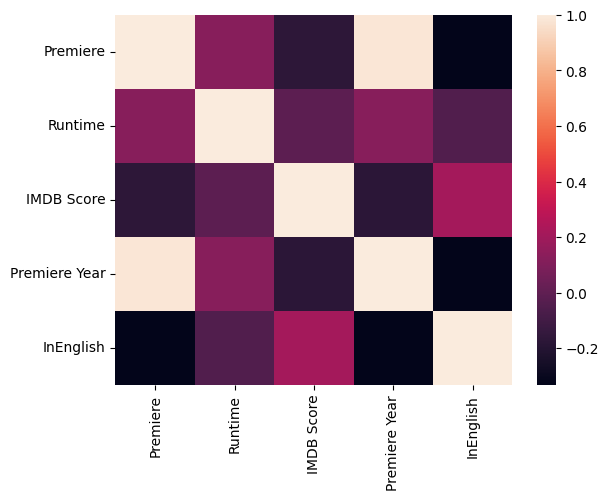

In [233]:
import seaborn as sns
sns.heatmap(corr_matrix);

#### Going to pick as X values: Genre, Premiere Year, IMDB Score for my predictive modelling

In [234]:
# Need to dummify Genre

genre_dummies = pd.get_dummies(n_topten['Genre'], dtype = int, drop_first = True, prefix = 'genre')

In [245]:
X = pd.concat([genre_dummies, n_topten['Premiere Year'], n_topten['IMDB Score']], axis = 1)

y = n_topten['InEnglish']

In [250]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=100)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print(f"Accuracy Score is: {metrics.accuracy_score(y_test, y_pred_class)}")
print(f"Recall Score is: {metrics.recall_score(y_test, y_pred_class)}")

Accuracy Score is: 0.696078431372549
Recall Score is: 0.7384615384615385


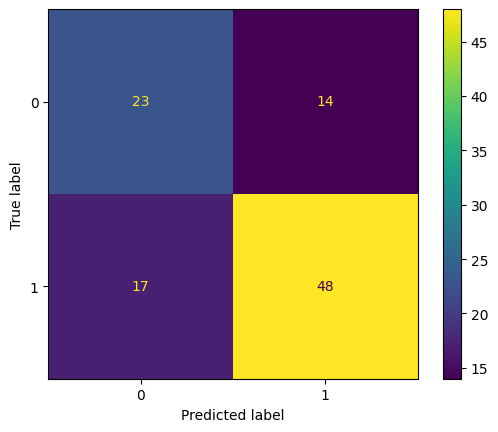

In [253]:
cm = confusion_matrix(y_test, y_pred_class)

disp = ConfusionMatrixDisplay(cm)
disp.plot();

LR 0.6862745098039216 , Recall:  0.8769230769230769


/Users/leahbenque/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



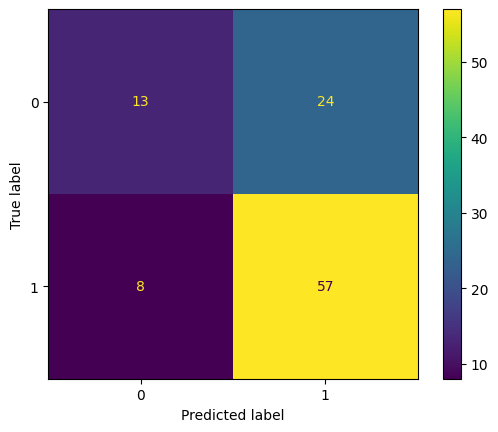

In [255]:
#Trying new model - LR - higher recall, and only slightly lower accuracy
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=100)

lr=LogisticRegression(random_state=100)

lr.fit(X_train,y_train)

predictions=lr.predict(X_test)

print('LR',metrics.accuracy_score(y_test,predictions), ', Recall: ', metrics.recall_score(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
cm

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show();